
<a href="http://www.cosmostat.org/" target="_blank"><img align="left" width="300" src="http://www.cosmostat.org/wp-content/uploads/2017/07/CosmoStat-Logo_WhiteBK-e1499155861666.png" alt="CosmoStat Logo"></a>
<br>
<br>
<br>
<br>

# Pandas Intro

---

> Author: <a href="http://www.cosmostat.org/people/santiago-casas" target="_blank" style="text-decoration:none; color: #F08080">Santiago Casas</a>  (based on the Python Data Science Handbook)
> Email: <a href="mailto:santiago.casas@cea.fr" style="text-decoration:none; color: #F08080">santiago.casas@cea.fr</a>  
> Year: 2019  
> Version: 1.0


<a href="https://pandas.pydata.org/" target="_blank"><img align="left" width="500" src="https://files.realpython.com/media/Python-Pandas-10-Tricks--Features-You-May-Not-Know-Watermark.e58bb5ce9835.jpg" alt="CosmoStat Logo"></a>

---
<br>

## Let's start by importing the necessary libraries


In [1]:
import numpy as np

In [2]:
import pandas as pd

## Contents

1. [Pandas Intro](#Pandas-Intro)
1. [Enter Pandas](#Enter-Pandas)
    1. [Pandas Series](#Pandas-Series)
    1. [Series as specialized dictionaries](#Series-as-specialized-dictionaries)
    1. [Data Frames as generalized numpy arrays](#Data-Frames-as-generalized-numpy-arrays)
    1. [Manipulating Data Frames](#Manipulating-Data-Frames)
    1. [Indexing with loc and iloc](#Indexing-with-loc-and-iloc)
    1. [Operations between DFs and Series](#Operations-between-DFs-and-Series)
    1. [Importing CSV files](#Importing-CSV-files)
    1. [Exercises](#Exercises)

# Enter Pandas

## Pandas Series

A Pandas `Series` is a one-dimensional array of indexed data. It is the most basic structure. It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Notice how we now get an index column, next to the array values. This index column is by default just a numbering of the entries.

The values are simply a numpy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

While the index is just an array-type object, special to `Pandas`

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

Data can be accessed like in a numpy array

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [7]:
data[1]

0.5

The Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
# Now we can access the data through an index
data['b']

0.5

## Series as specialized dictionaries

Instead of specifying the data and the indices seprately, we can inmediatly create a series from a dictionary.

In [10]:
population_dict = {'California': 38332521.,
                   'Texas': 26448193.,
                   'New York': 19651127.,
                   'Florida': 19552860.,
                   'Illinois': 12882135.}
population = pd.Series(population_dict)
population

California    38332521.0
Texas         26448193.0
New York      19651127.0
Florida       19552860.0
Illinois      12882135.0
dtype: float64

So we can simply ask, What is the population of California?

In [11]:
population['California']

38332521.0

And we can even perform slicing on the `'string'` indices:

In [12]:
population['California':'New York']

California    38332521.0
Texas         26448193.0
New York      19651127.0
dtype: float64

## Data Frames as generalized numpy arrays

From several dictionaries one can also construct a `DataFrame` object, basically what we scientists call tables, with a row of headers and a column of indices.

In [13]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

In [14]:
# Create a Series object
area = pd.Series(area_dict)

In [15]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now use population and area as two different columns in a `"database"`, which corresponds to a DataFrame.

In [16]:
states = pd.DataFrame({'population': population,
                       'area': area})

In [17]:
states

,population,area
California,38332521.0,423967
Texas,26448193.0,695662
New York,19651127.0,141297
Florida,19552860.0,170312
Illinois,12882135.0,149995


> **<font color='red'>NOTE:</font>** Notice the nice printing of a DataFrame in the form of a table !

DataFrame also has an index attribute

In [18]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

But now also the columns, have a generalized index

In [19]:
states.columns

Index(['population', 'area'], dtype='object')

A `DataFrame` behaves like a dictionary in which the `keys` are the columns.

In [20]:
# Notice is not the same behavior as for pd.Series, where square brackets access the index.
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [21]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

To access the rows (indices), one uses `loc`. We will see this later.

In [22]:
states.loc['California']

population    38332521.0
area            423967.0
Name: California, dtype: float64

And as opposed to a structured `numpy` array it does not return the rows when indexed with numbers

In [23]:
# This will raise an error, uncomment to see it
#states[0]

A `DataFrame` can be created from a list of dictionaries and `Pandas` will merge the indices accordingly.

In [24]:
list_of_dicts = [{'a': 1, 'b': 2}, {'b': 3, 'a': 4}]

In [25]:
pd.DataFrame(list_of_dicts)

,a,b
0,1,2
1,4,3


If some indices are not present in one or more of the dicts, `Pandas` will fill the columns with `naN`s.

In [26]:
list_of_dicts = [{'a': 1, 'b': 2, 'c':3}, {'a': 3, 'd': 4, 'b':6}]
pd.DataFrame(list_of_dicts)

,a,b,c,d
0,1,2,3.0,NaN
1,3,6,NaN,4.0


A useful tool for scientists working with numerical data, is to construct a `Pandas` `DataFrame` out of a numpy array, in which we label the rows and columns with strings.

In [27]:
xy_data=pd.DataFrame(np.random.rand(3, 2),
             columns=['X', 'Y'],
             index=['a', 'b', 'c'])
xy_data

,X,Y
a,0.573150,0.672517
b,0.212803,0.263659
c,0.836672,0.560158


In the same way that dictionaries can be "filled-up" by providing a new "key-value" pair, the same applies for `DataFrames`:

In [28]:
xy_data['Z'] = pd.Series([1.,1.,1.], index=xy_data.index)  # We pass the same index of the original DataFrame
xy_data

,X,Y,Z
a,0.573150,0.672517,1.0
b,0.212803,0.263659,1.0
c,0.836672,0.560158,1.0


> **Puzzle 1:** Do you think data frames can also be transposed like numpy arrays? 
What is the output of `(xy_data.T).columns[2]` ?

  * Option a): `c`
  * Option b): `X`
  * Option c): `0.303641`

In [29]:
#Answer Puzzle 1:
#Uncomment to see the result
#(xy_data.T).columns[2]

## Manipulating Data Frames

A very useful tool for scientists is to be able to compute derived quantities from given data.
In our `states` DataFrame:

In [30]:
states

,population,area
California,38332521.0,423967
Texas,26448193.0,695662
New York,19651127.0,141297
Florida,19552860.0,170312
Illinois,12882135.0,149995


We can create quickly a new `density` column by operating on the available data columns

In [31]:
states['density'] = states['population']/states['area']

In [32]:
states

,population,area,density
California,38332521.0,423967,90.413926
Texas,26448193.0,695662,38.018740
New York,19651127.0,141297,139.076746
Florida,19552860.0,170312,114.806121
Illinois,12882135.0,149995,85.883763


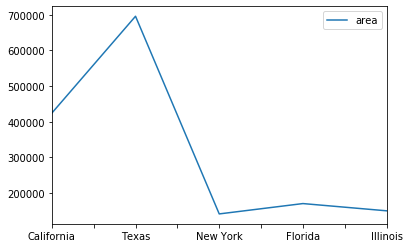

In [33]:
states.plot( y='area')

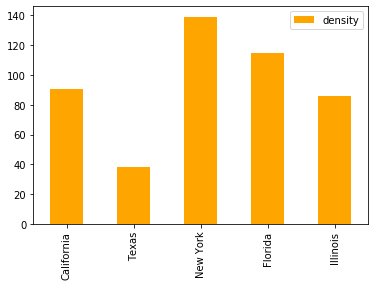

In [34]:
states.plot( y='density', kind='bar', color='orange')

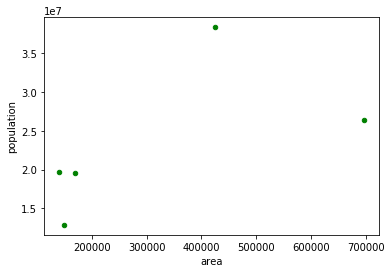

In [35]:
states.plot( x='area', y='population', kind='scatter', color='green')

In [36]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [37]:
states.density

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
Name: density, dtype: float64

*Masking* also works for `DataFrames`

In [38]:
# Which states have a density larger than 100?
states[states.density > 100]

,population,area,density
New York,19651127.0,141297,139.076746
Florida,19552860.0,170312,114.806121


As you can easily see, this properties are quite powerful when one has to analyze large datasets with thousands of columns and rows.

## Indexing with loc and iloc

In [39]:
data = pd.Series(['a', 'b', 'c', 'd'], index=[1, 2, 5, 6])

Notice that when the indices are integers, some confusions might appear.

In [40]:
# explicit index when indexing
data[2]

'b'

In [41]:
# This will raise an error: (uncomment to see it and comment back)
#data[3]

> **Puzzle 2:** What do you expect from the following slice: `data[2:4]` ? Which values will be returned?

In [42]:
#Answer Puzzle 6:
#Uncomment to see the answer
#data[2:4]

The maybe surprising result, is because `Pandas` uses the explicit indices in `index` when indexing, while the implicit (standard numpy) indices when slicing.

Due to this confusion, it is better to use the attributes `loc`, `iloc`.

### loc

First, the `loc` attribute allows indexing and slicing that always references the ***explicit*** index:

In [43]:
data.loc[1]

'a'

In [44]:
data.loc[1:3]

1    a
2    b
dtype: object

In [45]:
states.loc['California':'Texas']

,population,area,density
California,38332521.0,423967,90.413926
Texas,26448193.0,695662,38.018740


### iloc

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

In [46]:
data.iloc[1]

'b'

In [47]:
data.iloc[1:3]

2    b
5    c
dtype: object

> **<font color='red'>NOTE:</font>** Notice the difference with `loc` above !

In [48]:
states.iloc[0:2]

,population,area,density
California,38332521.0,423967,90.413926
Texas,26448193.0,695662,38.018740


One guiding principle of Python code is that "explicit is better than implicit." The explicit nature of `loc` and `iloc` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention. (from the PDSH)

In [49]:
states.iloc[:3, :2]

,population,area
California,38332521.0,423967
Texas,26448193.0,695662
New York,19651127.0,141297


Equivalently:

In [50]:
states.loc[:'New York',:'area']

,population,area
California,38332521.0,423967
Texas,26448193.0,695662
New York,19651127.0,141297


# Operations between DFs and Series

In the same way as boradcasting for `numpy` where we could have operations between arrays of different dimensions, here we can operate between `DataFrames` and `Series`.

This is quite useful again for treatment of numerical and statistical data.

Create a `DataFrame` of random ints of size (3,4), with given column names.

In [51]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,2,8,4,5
1,6,7,7,7
2,4,6,7,7


Apply a complicated function on the whole `DataFrame`

In [52]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.000000e+00,-2.449294e-16,1.224647e-16,-0.707107
1,-1.000000e+00,-7.071068e-01,-7.071068e-01,-0.707107
2,1.224647e-16,-1.000000e+00,-7.071068e-01,-0.707107


Internally, this has been done using `uFuncs` and `broadcasting`.

For numpy arrays, the operation works `row-wise` (notice the first row always being zero):

In [53]:
A = np.random.randint(10, size=(3, 4))
A - A[0]

array([[ 0,  0,  0,  0],
       [ 4, -1, -2,  6],
       [-2,  0,  0,  1]])

Create a `DataFrame` from `A`:

In [54]:
df = pd.DataFrame(A, columns=list('ABCD'))  #notice the `list` trick.
df

,A,B,C,D
0,3,9,2,3
1,7,8,0,9
2,1,9,2,4


Subtract the `0` row:

In [55]:
df - df.iloc[0]

,A,B,C,D
0,0,0,0,0
1,4,-1,-2,6
2,-2,0,0,1


If you wish to operate column-wise, use `loc` and the corresponding `uFunc` along the wanted axis.

In [56]:
df.subtract(df['A'], axis=0)

,A,B,C,D
0,0,6,-1,0
1,0,1,-7,2
2,0,8,1,3


Pandas has lots more of functionality that we can't cover in this session. But a look at the Python Data Science Handbook can reveal many more methods, attributes and tricks.

# Importing CSV files

A useful property of Pandas, is that it allows us to work with spreadsheets in a natural way.

In [57]:
#Import CSV data of average monthly Temperatures in Turrialba, Costa Rica from 1958 until 2016

In [58]:
cr_temp = pd.read_csv('./materials/CR_Temp.csv')

In [59]:
# Look at the first 5 rows with head()
cr_temp.head()

,N,YEAR,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
0,1,1958,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1,2,1959,20.8,21.1,22.0,22.4,23.0,23.0,22.5,22.5,23.0,22.7,22.0,21.2,22.2
2,3,1960,21.0,21.2,21.9,22.8,23.8,23.5,22.9,23.2,23.0,23.5,22.2,21.9,22.6
3,4,1961,21.1,21.6,22.1,22.5,22.5,22.4,22.7,23.1,22.7,22.8,22.4,22.7,22.4
4,5,1962,20.8,20.7,21.9,22.0,23.0,23.3,22.8,22.8,23.2,23.0,21.9,20.9,22.2


If we want to avoid having an index column which is just an integer count of the rows, we can specify it at import time.

In [60]:
cr_temp = pd.read_csv('./materials/CR_Temp.csv', index_col=1)
cr_temp.head()

,N,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
YEAR,,,,,,,,,,,,,,
1958,1,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1959,2,20.8,21.1,22.0,22.4,23.0,23.0,22.5,22.5,23.0,22.7,22.0,21.2,22.2
1960,3,21.0,21.2,21.9,22.8,23.8,23.5,22.9,23.2,23.0,23.5,22.2,21.9,22.6
1961,4,21.1,21.6,22.1,22.5,22.5,22.4,22.7,23.1,22.7,22.8,22.4,22.7,22.4
1962,5,20.8,20.7,21.9,22.0,23.0,23.3,22.8,22.8,23.2,23.0,21.9,20.9,22.2


In [61]:
#Get the columns
cr_temp.columns

Index(['N', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SET',
       'OCT', 'NOV', 'DIC', 'AVERAGE'],
      dtype='object')

In [63]:
#Get the index
cr_temp.index

Int64Index([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64', name='YEAR')

In [64]:
#Get the temperature of the 'ENE' month (January) in 1965
cr_temp.ENE[1965]

20.1

# Import CSV data from the Internet

The database is a subset of the data in three major catalogs: the Hipparcos Catalog,the Yale Bright Star Catalog (5th Edition), and the Gliese Catalog of Nearby Stars (3rd Edition). Each of these catalogs contains information useful to amateur astronomers:

1. The Hipparcos catalog is the largest collection of high-accuracy stellar positional data, particularly parallaxes, which makes it useful as a starting point for stellar distance data.
1. The Yale Bright Star Catalog contains basic data on essentially all naked-eye stars, including much information (such as the traditional Bayer Greek letters and Flamsteed numbers) missing from many other catalogs
1. The Gliese catalog is the most comprehensive catalog of nearby stars (those within 75 light years of the Sun). It contains many fainter stars not found in Hipparcos.

The name of the database comes from the three catalogs comprising its data: Hipparcos, Yale, and Gliese.

All told, this database contains ALL stars that are either brighter than a certain magnitude cutoff (magnitude +7.5 to +9.0) or within 50 parsecs (about 160 light years) from the Sun. The current version, v. 3.0, has no magnitude cutoff: any star in Hipparcos, Yale, or Gliese is represented.

The database is a comma separated values (CSV) file that can be imported into most database and spreadsheet programs. On this web site it is stored as a Zip file or a GZ file, which most popular unzippers can open.

http://www.astronexus.com/hyg

https://github.com/astronexus/HYG-Database/blob/master/README.md

In [65]:
hyg_database = pd.read_csv('https://raw.githubusercontent.com/astronexus/HYG-Database/master/hygdata_v3.csv')

In [66]:
hyg_database.shape

(119614, 37)

In [67]:
hyg_database.columns

Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')

In [68]:
hyg_database.head()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


In [71]:
hyg_database.tail()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
119609,119611,NaN,NaN,NaN,NN 4381,NaN,NaN,23.963895,38.629391,16.9492,...,NaN,NaN,NaN,1,119611,NaN,0.002200,NaN,NaN,NaN
119610,119612,NaN,NaN,NaN,NN 4385,NaN,NaN,23.996567,47.762093,16.7224,...,NaN,NaN,NaN,1,119612,NaN,0.000088,NaN,NaN,NaN
119611,119613,NaN,NaN,NaN,NN 4386,NaN,NaN,23.996218,-44.067905,18.5185,...,NaN,NaN,NaN,1,119613,NaN,0.002224,NaN,NaN,NaN
119612,119614,NaN,NaN,NaN,NN 4387,NaN,NaN,23.997386,-34.111986,12.8205,...,NaN,NaN,NaN,1,119614,NaN,0.001086,NaN,NaN,NaN
119613,119615,NaN,NaN,NaN,Gl 915,NaN,NaN,0.036059,-43.165974,7.8003,...,NaN,NaN,NaN,1,119615,NaN,0.000319,NaN,NaN,NaN


Let's eliminate rows which contain NaN  (Not a Number)

In [73]:
hyg_database['proper'].dropna()  #.sort_values().reset_index())

0                   Sol
676           Alpheratz
744                Caph
1065            Algenib
2076              Ankaa
              ...      
113008        Fomalhaut
113521           Scheat
113603           Markab
113687    Lacaille 9352
118084        p Eridani
Name: proper, Length: 146, dtype: object

In [80]:
proper_names = (hyg_database['proper'].dropna().sort_values().reset_index())

In [88]:
proper_names;

In [83]:
proper_names[proper_names['proper']=='Deneb']

,index,proper
53,101767,Deneb


In [84]:
hyg_database.iloc[101767]

id                   101767
hip                  102098
hd                   197345
hr                     7924
gl                      NaN
bf                50Alp Cyg
proper                Deneb
ra                  20.6905
dec                 45.2803
dist                  432.9
pmra                   1.56
pmdec                  1.55
rv                       -5
mag                    1.25
absmag               -6.932
spect                  A2Ia
ci                    0.092
x                   197.251
y                  -232.113
z                   307.601
vx                -1.33e-06
vy                 6.62e-06
vz                -1.34e-06
rarad               5.41677
decrad             0.790291
pmrarad         7.56309e-09
pmdecrad        7.51461e-09
bayer                   Alp
flam                     50
con                     Cyg
comp                      1
comp_primary         101767
base                    NaN
lum                 51617.9
var                     Alp
var_min             

In [85]:
hyg_database.query('proper == "Sirius"').loc[:,'proper':'dist']

,proper,ra,dec,dist
32263,Sirius,6.752481,-16.716116,2.6371


In [89]:
hyg_database['proper'].dropna()  #.sort_values().reset_index())
reduce_data = hyg_database[hyg_database['dist']<1000]

In [90]:
reduce_data.shape

(109399, 37)

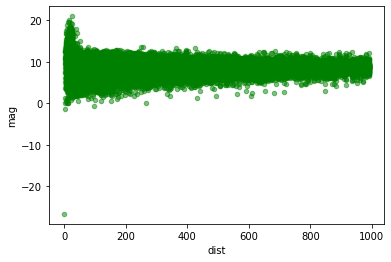

In [92]:
reduce_data.plot( x='dist', y='mag', kind='scatter', color='green', alpha=0.5)

# Exercises

## Multi-Index guided exercise

1. Imagine the data for the states is from year 2010. Add a column to the `states` dataframe, 
   that specifies the year of the data.
2. Copy the dataframe and imagine that by the year 2020, the population increased by 10% in all states, except Florida, where it decreased 5%. Name the second dataframe `states2020`.
3. Don't forget to update the density.
3. Use the `df.reset_index()` function to get numeric indices for the df's.
4. Use the `append` function and the `ignore_index=True` option to append one data frame to the other. Name the new dataframe: `yearly_states`.
5. Use `rename(columns={'index':'state'})` to rename a column of the index.
5. Use `set_index(['state', 'year'], inplace=True)` to obtain a df, with multiindex.
6. Use `sort_index(inplace=True)` to sort the multiindex.
6. Using `groupby('state').mean()` obtain the mean values for each state.
7. Do the same, to obtain the mean values for each year.
8. Finally, using `idx=pd.IndexSlice` and `loc[idx[start:end:step],idx[start:end:step]]` obtain the initial `states` dataframe, from the `yearly_states` dataframe and compare.


## Exercise 2:  Turrialba dataset

1. Compute the yearly temperature average and check if it matches what is given in the last column of the csv file. You can drop the `N` column with pd.drop(columns=...)

2. Averaging over all the years, which is the hottest month in Turrialba, CR? *Hints:* np.mean, np.max, `loc` and slicing.

3. Using the built-in plotting routine of Pandas, can you notice any effect of climate change over the years? *Hint:* plot is a built-in method of a Pandas `DataFrame`. You can plot any column or any row using the masking and slicing seen above.